# Crop Yield Prediction
 
The science of training machines to learn and produce models for future predictions is widely used, and not for nothing.
Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change. 

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on <i><b>weather conditions (rain, temperature, etc)</b></i>, pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.  The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this paper the prediction of <b>top 10 most consumed yields all over the world</b> is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem
 
 These corps include :

- Cassava                
- Maize                  
- Plantains and others   
- Potatoes                
- Rice, paddy             
- Sorghum                
- Soybeans               
- Sweet potatoes       
- Wheat                  
- Yams             

In [1]:
import numpy as np 
import pandas as pd 
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV




In [2]:
yield_df = pd.read_csv('Data_Preprocessed.csv')
yield_df


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results. 


In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
features = features.drop(['Year'], axis=1)

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.6 MB


In [7]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



### Scaling Features: 

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

After dropping year column in addition to scaling all values in features, the resulting array will look something like this : 

In [9]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data: 

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset) 



In [10]:
from sklearn.model_selection import train_test_split

# Splitting data set - 25% test dataset and 75% 

train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=5)

print("x_train :",train_data.shape)
print("x_test :",test_data.shape)
print("y_train :",train_labels.shape)
print("y_test :",test_labels.shape)

x_train : (21181, 114)
x_test : (7061, 114)
y_train : (21181,)
y_test : (7061,)


In [11]:
print(train_data)
print(train_labels)

[[3.23612418e-01 3.93859654e-02 8.90971039e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.99121982e-01 1.18351301e-03 8.18739353e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.51458137e-01 7.24648100e-02 5.59795571e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.95798056e-02 2.03818630e-04 3.39011925e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.24365005e-02 4.02416719e-05 9.14139693e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.36218250e-01 2.05717303e-01 8.21465077e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
13634     88943
24366     22497
1341      19487
17393     38500
22371     12160
          ...  
3046     130631
26301      6107
20463    165000
18638    159665
2915     107920
Name: hg/ha_yield, Length: 21181, dtype: int64


# Linear Regression

In [12]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data,train_labels)

LinearRegression()

In [13]:
# Predicting the test Results 

lr_predict = model.predict(test_data)
lr_predict

array([  7932.5,  69753.5, -25712.5, ...,  46842. ,  10938.5,  -1220.5])

In [14]:
model.score(test_data,test_labels)

0.7449639335582788

In [15]:
from sklearn.metrics import r2_score
lr_r = r2_score(test_labels,lr_predict)
print("R2 score : ",lr_r)
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-lr_r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

R2 score :  0.7449639335582788
Adj. R-Squared : 0.7407781990960911


Text(0.5, 1.0, 'Linear Regression')

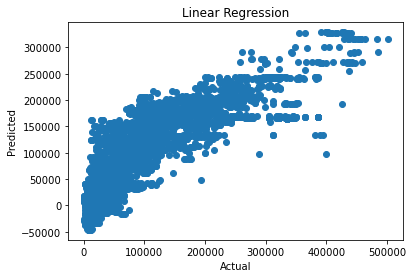

In [16]:
plt.scatter(test_labels,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 501)
model.fit(train_data,train_labels)
rf_predict = model.predict(test_data)
rf_predict

array([15379.02195609, 57269.90153027, 17845.35928144, ...,
       28523.09381238, 18483.3253493 , 22473.31137725])

In [18]:
model.score(test_data,test_labels)

0.9742270737443746

In [19]:
# Calculating R2 score

from sklearn.metrics import r2_score
rf_r1 = r2_score(test_labels,rf_predict)
print("R2 score : ",rf_r1)
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-rf_r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

R2 score :  0.9742270737443746
Adj. R-Squared : 0.9738040801375302


Text(0.5, 1.0, 'Random Forest')

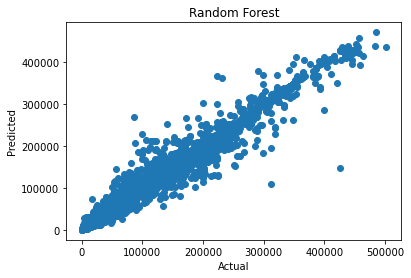

In [20]:
plt.scatter(test_labels,rf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# Hypertuning Random Forest using Grid Search CV

In [21]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [22]:
# Define hyperparameters to tune
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15,95,96,97],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV object
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(train_data,train_labels)

# Print best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 95, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9740601583757188


In [23]:
rf2 =  RandomForestRegressor(max_depth= 96, min_samples_leaf= 1, min_samples_split=5, n_estimators= 200)
rf2.fit(train_data,train_labels)
hrf_predict = rf2.predict(test_data)
hrf_predict
hrf_r1 = rf2.score(test_data,hrf_predict)
print("R2 score : ",hrf_r1)
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-hrf_r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

R2 score :  1.0
Adj. R-Squared : 1.0


Text(0.5, 1.0, 'Hypertuned Random Forest')

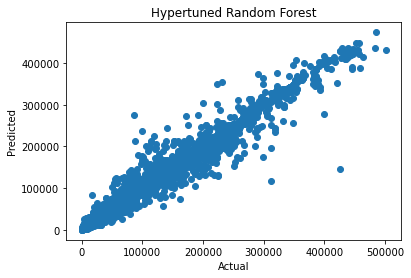

In [24]:
plt.scatter(test_labels,hrf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Hypertuned Random Forest')

# Decision Tree

In [25]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(train_data,train_labels)

# Predicting results
decisiontree_predict = regressor.predict(test_data)
decisiontree_predict

array([ 7640., 66475., 18000., ..., 28508., 19125., 22493.])

In [26]:
regressor.score(test_data,test_labels)

0.9595771298941649

In [27]:
# Calculating R2 score :

from sklearn.metrics import r2_score
dt_r2 = r2_score(test_labels,decisiontree_predict)
print("R2 score : ",dt_r2)

R2 score :  0.9595771298941649


In [28]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-dt_r2)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.9589136966675502


Text(0.5, 1.0, 'Decision Tree')

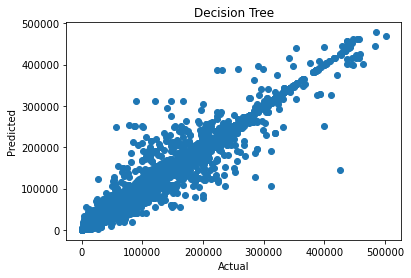

In [29]:
plt.scatter(test_labels,decisiontree_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Model Comparison & Selection 


In [30]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    cmp_pred=fit.predict(test_data)
    cmp_r2=r2_score(test_labels,cmp_pred)
    return([model_name,cmp_r2])

## Ensembling Random Forest and Gradient Boosting

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [32]:
model_train=list(map(compare_models,models)) 

In [33]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8947058483090136]
['RandomForestRegressor', 0.6734689585388964]
['SVR', -0.21027832132033386]
['DecisionTreeRegressor', 0.9597841413485876]


The evaluation metric is set based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model. **R^2** score shows how well terms (data points) fit a curve or line.

**R^2** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance. 

From results viewd above, **Decision Tree Regressor** has the highest R^2 score 0f **96%**, **GradientBoostingRegressor** comes second. 


 I'll also calculate **Adjusted R^2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2. 

In [34]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [35]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [37]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.391659,0.009141,0.550596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.300721,0.000109,0.786031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.354029,0.000239,0.757070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.206219,0.705622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.169332,0.236961,0.559114,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.391659,0.009141,0.550596
1,0.300721,0.000109,0.786031
2,0.354029,0.000239,0.757070
3,1.000000,0.206219,0.705622
4,0.169332,0.236961,0.559114


In [39]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.391659,0.009141,0.550596,Uruguay,Soybeans
1,0.300721,0.000109,0.786031,Angola,Sweet potatoes
2,0.354029,0.000239,0.757070,Uganda,Wheat
3,1.000000,0.206219,0.705622,Colombia,Cassava
4,0.169332,0.236961,0.559114,Argentina,Cassava


In [40]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)
ensemblerg_pred = model.predict(test_data)
test_df["yield_predicted"]= ensemblerg_pred
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

#R2 Score
from sklearn.metrics import r2_score
ergr1 = r2_score(test_labels,ensemblerg_pred)
print("R2 score : ",ergr1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-ergr1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

R2 score :  0.9618135066230096
Adj. R-Squared : 0.9611867775350486


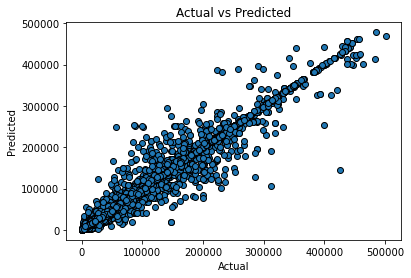

In [41]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

## Ensembling Random Forest and CNN

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# Define CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))

In [43]:
# Train CNN model
cnn.compile(optimizer='adam', loss='mse')
train_data_cnn = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data_cnn = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
cnn.fit(train_data_cnn, train_labels, epochs=10, batch_size=32, verbose=0)

# Train RFR model
rfr = RandomForestRegressor(n_estimators=500, max_depth=95, random_state=42)
rfr.fit(train_data, train_labels)

# Ensemble model by concatenating features from RFR and CNN
train_data_ensemble = np.concatenate([rfr.predict(train_data).reshape(-1, 1), cnn.predict(train_data_cnn)], axis=1)
test_data_ensemble = np.concatenate([rfr.predict(test_data).reshape(-1, 1), cnn.predict(test_data_cnn)], axis=1)

# Train the ensemble model using a simple linear regression model
from sklearn.linear_model import LinearRegression
ensemble = LinearRegression()
ensemble.fit(train_data_ensemble, train_labels)

221/221 [==============================] - 0s 2ms/step


LinearRegression()

In [44]:
# Evaluate the ensemble model
ensemblercnn_pred = ensemble.predict(test_data_ensemble)
print("Ensemble MSE:", mean_squared_error(test_labels, ensemblercnn_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, ensemblercnn_pred))

#R2 Score
from sklearn.metrics import r2_score
ensemblercnn_r1 = r2_score(test_labels,ensemblercnn_pred)
print("R2 score : ",ensemblercnn_r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-ensemblercnn_r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Ensemble MSE: 191489197.24378183
Ensemble MAE: 5780.60127142111
R2 score :  0.9741329268503975
Adj. R-Squared : 0.9737083880742595


Text(0.5, 1.0, 'Ensemble Random Forest and CNN')

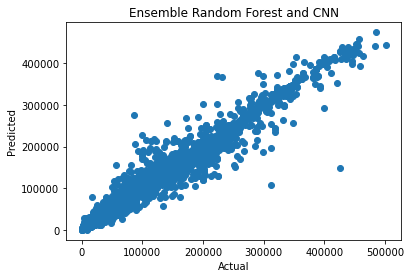

In [45]:
plt.scatter(test_labels,ensemblercnn_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ensemble Random Forest and CNN')

In this example code, we load the MNIST dataset and preprocess it by normalizing the pixel values and converting the target labels to one-hot encoded vectors.

We define a CNN model with two convolution layers, two max pooling layers, and two dense layers. We compile the model with the Adam optimizer and categorical cross-entropy loss function.

We train the model using the fit method, passing in the training data and labels, the number of epochs, batch size, and validation data. The fit method updates the model parameters by minimizing the loss function using backpropagation and gradient descent.

## Ensembling Random Forest, SVM and CNN

In [46]:
# Define CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))

# Train CNN model
cnn.compile(optimizer='adam', loss='mse')
train_data_cnn = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data_cnn = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
cnn.fit(train_data_cnn, train_labels, epochs=10, batch_size=32, verbose=0)

# Train RFR model
rfr = RandomForestRegressor(n_estimators=500, max_depth=95, random_state=42)
rfr.fit(train_data, train_labels)

# Define SVM Regression model
svm_model = SVR(kernel='linear')

# Train SVM Regression model
svm_model.fit(train_data.reshape(train_data.shape[0], -1), train_labels)

SVR(kernel='linear')

In [47]:
# Ensemble model by concatenating features from RFR and CNN
# Predict using Random Forest Regression model
rf_pred = rfr.predict(test_data.reshape(test_data.shape[0], -1))

# Predict using SVM Regression model
svm_pred = svm_model.predict(test_data.reshape(test_data.shape[0], -1))

# Predict using CNN model
cnn_pred = cnn.predict(test_data)

train_data_ensemble = (0.34 * rf_pred) + (0.33 * svm_pred) + (0.33 * cnn_pred)


# Ensemble model by concatenating features from RFR and CNN
train_data_ensemble = np.concatenate([rfr.predict(train_data).reshape(-1, 1), cnn.predict(train_data_cnn)], axis=1)
test_data_ensemble = np.concatenate([rfr.predict(test_data).reshape(-1, 1), cnn.predict(test_data_cnn)], axis=1)
train_data_ensemble

221/221 [==============================] - 0s 2ms/step


array([[ 88899.472     ,  38737.6015625 ],
       [ 23216.608     ,  35969.1328125 ],
       [ 19163.232     ,  51934.3125    ],
       ...,
       [153054.522     , 138861.9375    ],
       [144946.072     ,  60335.0078125 ],
       [107490.17      ,  32570.43945312]])

In [48]:
ensemble_RFSVMCNN = LinearRegression()
ensemble_RFSVMCNN_model = ensemble_RFSVMCNN.fit(train_data_ensemble, train_labels)

# Evaluate the ensemble model
ensemblersvmcnn_pred = ensemble_RFSVMCNN.predict(test_data_ensemble)
ensemblersvmcnn_pred

array([14269.03654815, 58112.84984302, 17645.57212999, ...,
       28438.66278458, 18353.35943309, 22323.85810094])

In [49]:
print("Ensemble MSE:", mean_squared_error(test_labels, ensemblersvmcnn_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, ensemblersvmcnn_pred))

#R2 Score
from sklearn.metrics import r2_score
ensemblersvmcnn_r1 = r2_score(test_labels,ensemblersvmcnn_pred)
print("R2 score : ",ensemblersvmcnn_r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-ensemblersvmcnn_r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Ensemble MSE: 191495409.11737615
Ensemble MAE: 5781.313584580618
R2 score :  0.9741320877274028
Adj. R-Squared : 0.9737075351793066


Text(0.5, 1.0, 'Ensemble Random Forest,SVM and CNN')

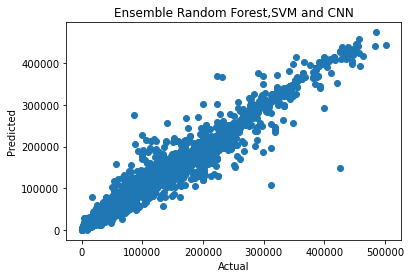

In [50]:
plt.scatter(test_labels,ensemblersvmcnn_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ensemble Random Forest,SVM and CNN')

# Decision Tree and CNN

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train = train_data
y_train = train_labels

# Train the CNN model
num_classes = len(np.unique(y_train))

In [52]:
# Define CNN model
class CNN:
    def __init__(self):
        self.filters1 = 64
        self.filters2 = 64
        self.filters3 = 64
        self.kernel_size1 = 3
        self.kernel_size2 = 6
        self.kernel_size3 = 9
        self.activation = 'relu'
        self.pool_size = 2
        self.hidden_size = 50
        self.model = None

    def fit(self, X_train, y_train):
        X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

        cnn = Sequential()
        cnn.add(Conv1D(filters=self.filters1, kernel_size=self.kernel_size1, activation=self.activation, input_shape=(114, 1)))
        cnn.add(MaxPooling1D(pool_size=self.pool_size))
        cnn.add(Conv1D(filters=self.filters2, kernel_size=self.kernel_size2, activation=self.activation))
        cnn.add(MaxPooling1D(pool_size=self.pool_size))
        cnn.add(Conv1D(filters=self.filters3, kernel_size=self.kernel_size3, activation=self.activation))
        cnn.add(MaxPooling1D(pool_size=self.pool_size))
        cnn.add(Flatten())
        cnn.add(Dense(self.hidden_size, activation=self.activation))
        cnn.add(Dense(1))

        # Train CNN model
        cnn.compile(optimizer='adam', loss='mse')
        cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)
        self.model = cnn

    def predict(self, X):
        X_cnn = X.reshape((X.shape[0], X.shape[1], 1))
        return self.model.predict(X_cnn)

In [53]:
cnn = CNN()
cnn.fit(train_data, train_labels)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Ensemble model by concatenating features from dt_model and CNN
train_data_ensemble = np.concatenate([dt_model.predict(train_data).reshape(-1, 1), cnn.predict(train_data)], axis=1)
test_data_ensemble = np.concatenate([dt_model.predict(test_data).reshape(-1, 1), cnn.predict(test_data)], axis=1)

# Train the ensemble model using a simple linear regression model
ensemble_DTCCNN = LinearRegression()
ensemble_DTCCNN_models = ensemble_DTCCNN.fit(train_data_ensemble, train_labels)
# Evaluate the ensemble model
ensembledtccnn_pred = ensemble_DTCCNN.predict(test_data_ensemble)
ensembledtccnn_pred

221/221 [==============================] - 0s 2ms/step


array([23246.61616662, 66462.66523288, 18003.53076495, ...,
       28579.06387699, 18520.67922597, 22535.82074639])

In [54]:

print("Ensemble MSE:", mean_squared_error(test_labels, ensembledtccnn_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, ensembledtccnn_pred))

#R2 Score
ensembledtccnn_r1 = r2_score(test_labels,ensembledtccnn_pred)
print("R2 score : ",ensembledtccnn_r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-ensembledtccnn_r1)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Ensemble MSE: 509474177.5110761
Ensemble MAE: 6993.510833621976
R2 score :  0.931178332735214
Adj. R-Squared : 0.9300488092586541


Text(0.5, 1.0, 'Ensemble Decision Tree and CNN')

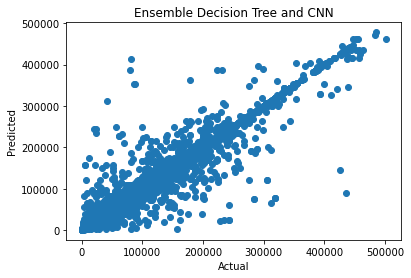

In [55]:
plt.scatter(test_labels,ensembledtccnn_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ensemble Decision Tree and CNN')


#   Store the model names and their accuracy in a dataframe

In [62]:
res = []
res = pd.DataFrame(res)
res["models"] = ["Random Forest,SVM and CNN", "Desicion Tree and CNN"]
res["R2-Score"] = [ round(r2_score(test_labels,ensemblersvmcnn_pred)*100,2),round(r2_score(test_labels,ensembledtccnn_pred)*100,2)]
res = res.sort_values("R2-Score", ascending=False).reset_index(drop=True)
res.to_csv('model_results.csv', index=False)
res

,models,R2-Score
0,"Random Forest,SVM and CNN",97.41
1,Desicion Tree and CNN,93.12


#  Save the traied models locally

In [63]:
import joblib

joblib.dump(ensemble_RFSVMCNN_model, 'Trained Models/ensemble_RFSVMCNN.pkl')
joblib.dump(ensemble_DTCCNN_models, 'Trained Models/ensemble_DTCCNN.pkl')

['Trained Models/ensemble_DTCCNN.pkl']

# Model Results and Conclusion

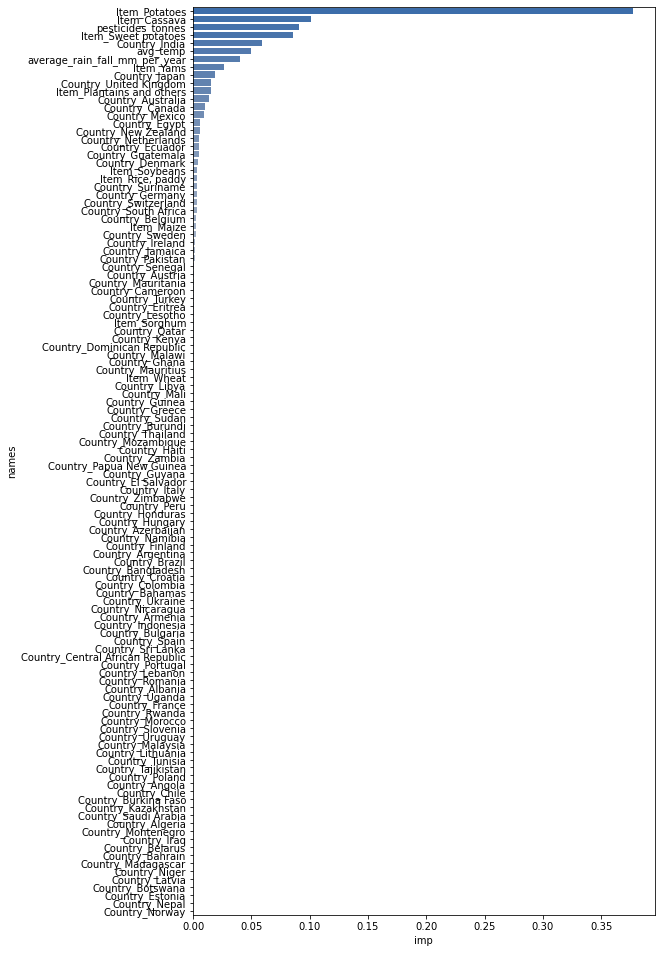

In [64]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

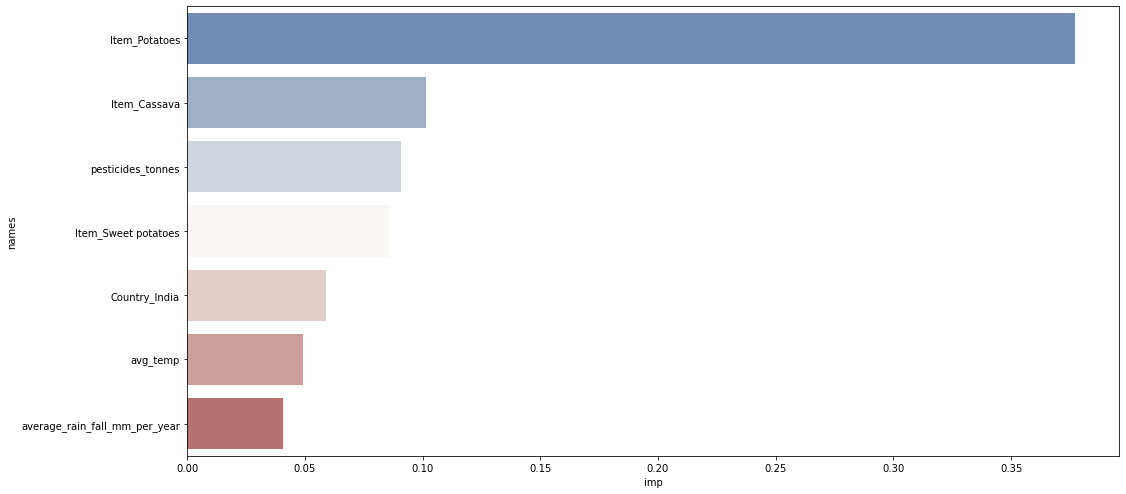

In [65]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

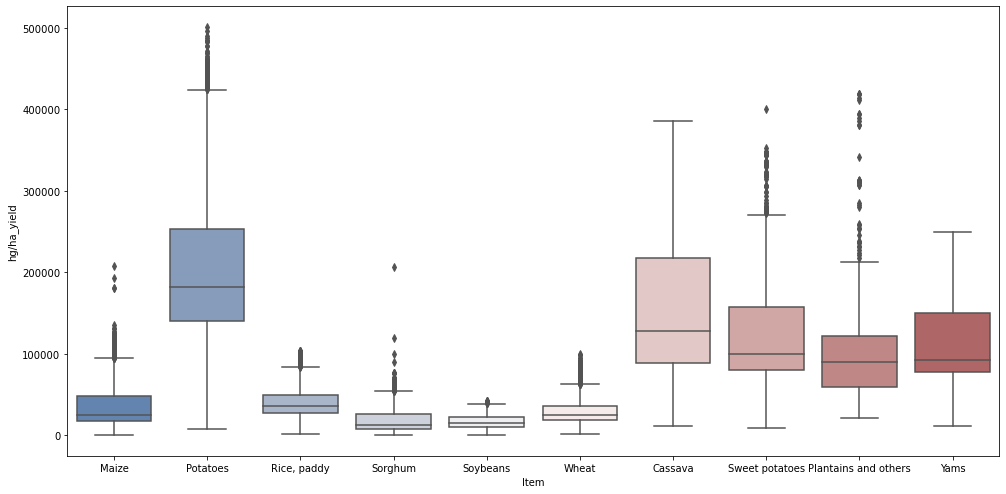

In [66]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);